## Backscatter Coefficients
Comparing Monte Carlo to Heinrich's tabulation

In [1]:
using NeXLCore
using DataFrames
using CSV
using Gadfly

In [2]:
function backscatter(elm::Element, e0, traj=10000)
  count = 0
  sample = bulk(pure(elm))
  for i in Base.OneTo(traj)
    bs = false
    trajectory(gun(Electron, e0, 1.0e-6), sample) do part, reg
      bs = reg==sample # The final region is the chamber...
    end
    count += (bs ? 1 : 0)
  end
  return count/traj
end

backscatter (generic function with 2 methods)

In [3]:
using BenchmarkTools
@btime backscatter(n"C",20.0e3)
@btime backscatter(n"Al",20.0e3)
@btime backscatter(n"Fe",20.0e3)
@btime backscatter(n"U",20.0e3)

  3.215 s (75341207 allocations: 2.41 GiB)


  4.365 s (100627875 allocations: 3.21 GiB)


  4.906 s (115504035 allocations: 3.69 GiB)


  4.842 s (111527531 allocations: 3.56 GiB)


0.5059

In [11]:
hr=CSV.read(joinpath(@__DIR__,"..","data","HeinrichBackscatterCoefficients.csv"), DataFrame)

Row,Z,10 keV,20 keV,30 keV,40 keV,49 keV
,Int64,Float64?,Float64?,Float64,Float64?,Float64?
1,6,0.069,0.06,0.052,0.054,0.052
2,12,0.145,0.14,0.136,0.132,0.13
3,13,missing,missing,0.149,missing,missing
4,14,0.174,0.164,0.159,0.153,0.15
5,22,0.262,0.253,0.243,0.245,0.243
6,24,0.273,0.268,0.265,0.259,0.256
7,25,0.292,0.286,0.284,0.277,0.276
8,26,0.289,0.287,0.275,0.276,0.282
9,27,0.309,0.302,0.302,0.297,0.292


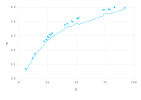

In [12]:
hr[:,"MC[10 keV]"]=[ backscatter(elements[z], 10.0e3) for z in hr[:,"Z"] ]
plot(
  layer(x=hr[:,"Z"], y=hr[:,"10 keV"], Geom.point),
  layer(x=hr[:,"Z"], y=hr[:,"MC[10 keV]"], Geom.line)
)

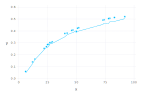

In [13]:
hr[:,"MC[20 keV]"]=[ backscatter(elements[z], 20.0e3) for z in hr[:,"Z"] ]
plot(
  layer(x=hr[:,"Z"], y=hr[:,"20 keV"], Geom.point),
  layer(x=hr[:,"Z"], y=hr[:,"MC[20 keV]"], Geom.line)
)

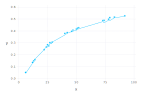

In [14]:
hr[:,"MC[30 keV]"]=[ backscatter(elements[z], 30.0e3) for z in hr[:,"Z"] ]
plot(
  layer(x=hr[:,"Z"], y=hr[:,"30 keV"], Geom.point),
  layer(x=hr[:,"Z"], y=hr[:,"MC[30 keV]"], Geom.line)
)

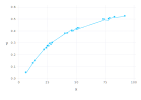

In [15]:
hr[:,"MC[40 keV]"]=[ backscatter(elements[z],40.0e3) for z in hr[:,"Z"] ]
plot(
  layer(x=hr[:,"Z"], y=hr[:,"40 keV"], Geom.point),
  layer(x=hr[:,"Z"], y=hr[:,"MC[40 keV]"], Geom.line)
)

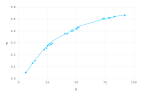

In [16]:
hr[:,"MC[49 keV]"]=[ backscatter(elements[z],49.0e3) for z in hr[:,"Z"] ]
plot(
  layer(x=hr[:,"Z"], y=hr[:,"49 keV"], Geom.point),
  layer(x=hr[:,"Z"], y=hr[:,"MC[49 keV]"], Geom.line)
)